##### *Import Libraries*

In [1]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.figsize'] = (20,10)

##### *Load Data Set*

In [2]:
well_data = pd.read_csv('./796_wells_lat_long.csv')
well_data.head()

,R_date,Latitude,Longitude,24/04/1995 12:00,24/04/2000 12:00,25/04/2005 12:00,26/04/2010 12:00,27/04/2015 12:00
0,BA003_A,22.84,90.52,-0.34,-0.24,-0.68,-1.29,-0.81
1,BA008_A,22.49,90.07,1.36,1.61,1.21,1.48,1.66
2,BA009_B,22.82,90.21,-0.21,0.14,-0.26,NaN,-0.18
3,BA010_A,22.83,90.28,0.81,1.41,1.21,NaN,1.31
4,BA011_A,22.96,90.52,0.25,1.83,0.80,NaN,0.90


In [3]:
# basic statistical description of the data
well_data.describe()

,Latitude,Longitude,24/04/1995 12:00,24/04/2000 12:00,25/04/2005 12:00,26/04/2010 12:00,27/04/2015 12:00
count,796.000000,796.000000,766.000000,756.000000,727.000000,557.000000,548.000000
mean,24.415264,89.674128,12.257115,13.341243,12.594691,13.197774,14.615474
std,0.999505,0.948122,16.262021,16.550045,16.567202,17.880531,18.545517
min,20.900000,88.120000,-14.990000,-26.620000,-53.740000,-58.330000,-58.650000
25%,23.697500,88.917500,2.160000,2.817500,2.390000,1.960000,2.855000
50%,24.370000,89.510000,6.270000,7.345000,6.770000,6.660000,7.345000
75%,25.020000,90.342500,14.235000,15.227500,14.635000,16.250000,20.970000
max,26.590000,92.340000,97.540000,97.700000,97.820000,97.200000,97.330000


##### *Clean Data Set*

In [4]:
# setting column names for easy referencing
convenient_column_names = ['R_date','Lat','Lon','1995','2000','2005','2010','2015']
well_data.columns = convenient_column_names
well_data.describe()

,Lat,Lon,1995,2000,2005,2010,2015
count,796.000000,796.000000,766.000000,756.000000,727.000000,557.000000,548.000000
mean,24.415264,89.674128,12.257115,13.341243,12.594691,13.197774,14.615474
std,0.999505,0.948122,16.262021,16.550045,16.567202,17.880531,18.545517
min,20.900000,88.120000,-14.990000,-26.620000,-53.740000,-58.330000,-58.650000
25%,23.697500,88.917500,2.160000,2.817500,2.390000,1.960000,2.855000
50%,24.370000,89.510000,6.270000,7.345000,6.770000,6.660000,7.345000
75%,25.020000,90.342500,14.235000,15.227500,14.635000,16.250000,20.970000
max,26.590000,92.340000,97.540000,97.700000,97.820000,97.200000,97.330000


In [5]:
# making a function that returns a data set containing valid ie not null values of a certain year
def clean_data(column,df=well_data):
    columns_to_keep = ['Lat','Lon',column]
    out_df = df.copy().loc[:,columns_to_keep]
    out_df = out_df[out_df[column].notna()]
    out_df = gpd.GeoDataFrame(out_df, geometry=gpd.points_from_xy(out_df['Lon'], out_df['Lat']))
    return out_df
    

In [6]:
clean_data('1995')

,Lat,Lon,1995,geometry
0,22.84,90.52,-0.34,POINT (90.52000 22.84000)
1,22.49,90.07,1.36,POINT (90.07000 22.49000)
2,22.82,90.21,-0.21,POINT (90.21000 22.82000)
3,22.83,90.28,0.81,POINT (90.28000 22.83000)
4,22.96,90.52,0.25,POINT (90.52000 22.96000)
...,...,...,...,...
791,24.28,89.84,7.32,POINT (89.84000 24.28000)
792,24.51,90.11,5.34,POINT (90.11000 24.51000)
793,24.31,89.97,6.99,POINT (89.97000 24.31000)
794,24.48,90.00,7.07,POINT (90.00000 24.48000)


In [7]:
# storing cleaned data in a dictionary named df for easy future use
df = dict((x,clean_data(x)) for x in convenient_column_names[3:])
df

{'1995':        Lat    Lon  1995                   geometry
 0    22.84  90.52 -0.34  POINT (90.52000 22.84000)
 1    22.49  90.07  1.36  POINT (90.07000 22.49000)
 2    22.82  90.21 -0.21  POINT (90.21000 22.82000)
 3    22.83  90.28  0.81  POINT (90.28000 22.83000)
 4    22.96  90.52  0.25  POINT (90.52000 22.96000)
 ..     ...    ...   ...                        ...
 791  24.28  89.84  7.32  POINT (89.84000 24.28000)
 792  24.51  90.11  5.34  POINT (90.11000 24.51000)
 793  24.31  89.97  6.99  POINT (89.97000 24.31000)
 794  24.48  90.00  7.07  POINT (90.00000 24.48000)
 795  24.29  89.89  6.72  POINT (89.89000 24.29000)
 
 [766 rows x 4 columns],
 '2000':        Lat    Lon   2000                   geometry
 0    22.84  90.52  -0.24  POINT (90.52000 22.84000)
 1    22.49  90.07   1.61  POINT (90.07000 22.49000)
 2    22.82  90.21   0.14  POINT (90.21000 22.82000)
 3    22.83  90.28   1.41  POINT (90.28000 22.83000)
 4    22.96  90.52   1.83  POINT (90.52000 22.96000)
 ..     ...    


---

### Load Bangladesh Shape file

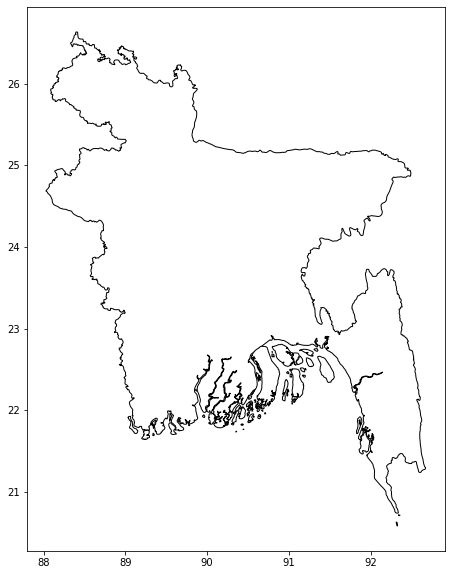

In [8]:
# Plot map of Bangladesh
bd_map_ax = gpd.read_file('./Bangladesh.shp').plot(edgecolor='black', color='white')

In [20]:
# Now converting this work-flow to a function for rest data
def generate_plot(column_name,geometry_col='geometry',df=df):
    country_ax = gpd.read_file('./Bangladesh.shp').plot(edgecolor='black', color='white')
    da = df[column_name].copy()
    well_points = da.loc[:,[column_name,geometry_col]].plot(color='red', marker='+',ax=country_ax)
    well_points.set_title(column_name);
    well_points.set_xlabel('Longitude')
    well_points.set_ylabel('Latitude')
    fig = well_points.get_figure()
    return fig,well_points

[<Figure size 1440x720 with 1 Axes>,
 <Figure size 1440x720 with 1 Axes>,
 <Figure size 1440x720 with 1 Axes>,
 <Figure size 1440x720 with 1 Axes>,
 <Figure size 1440x720 with 1 Axes>]

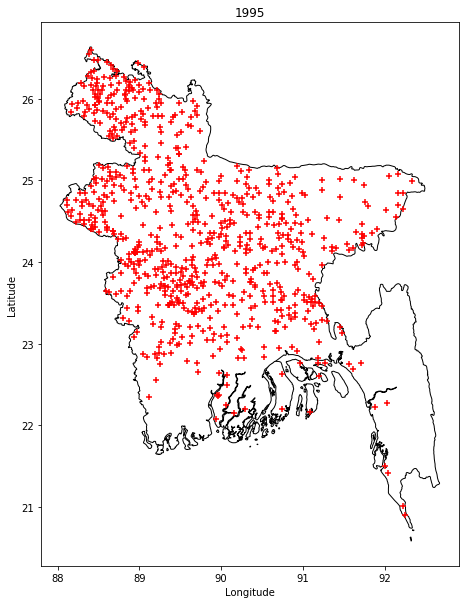

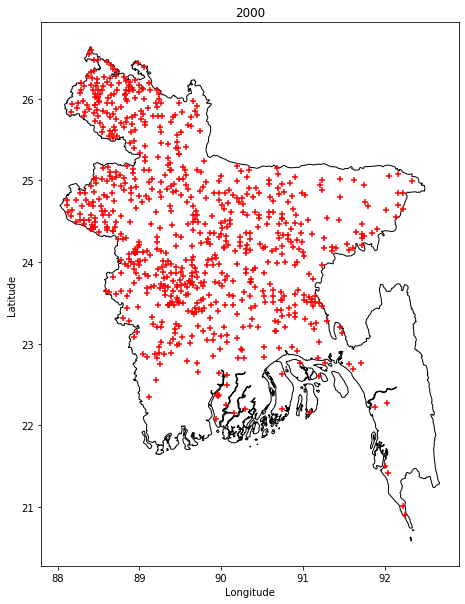

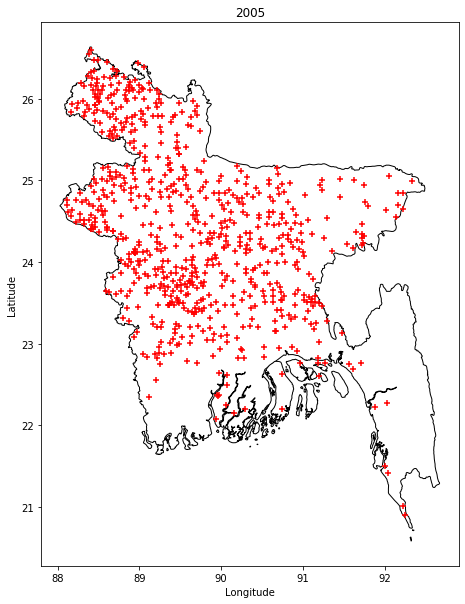

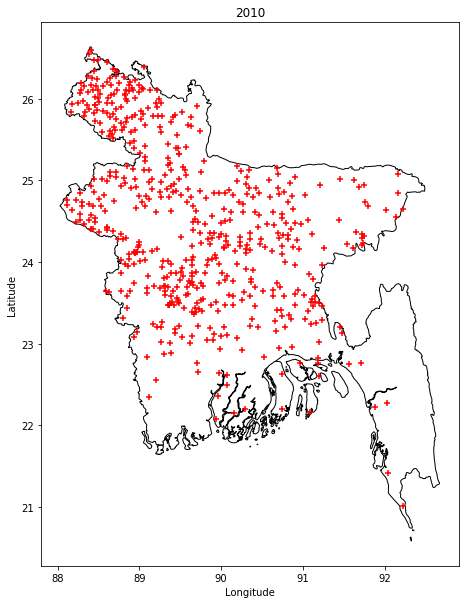

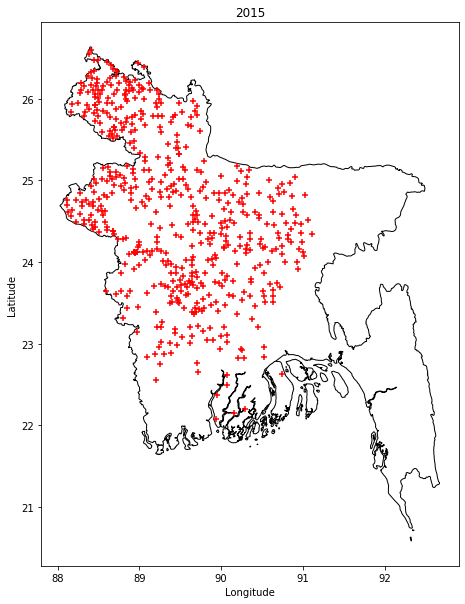

In [21]:
# Store every figures in another dictionary
li =[]
for x in convenient_column_names[3:]:
    d,y = generate_plot(x)
    d.savefig(x+'.png')
    li.append(d)
li